In [13]:
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
#

# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
# from sklearn.metrics import accuracy_score, precision_recall_curve, plot_roc_curve, plot_confusion_matrix
# from sklearn.metrics import SCORERS, plot_precision_recall_curve
from sklearn.metrics import *
from sklearn.utils import parallel_backend
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer

from matplotlib import pyplot as plt
%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"

# Constants
SEED = 87654

In [14]:
model = joblib.load('../models/fitted-nnet-activation-logistic.joblib')
# model

In [15]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['tenth_day_credits',
                                                   'num_courses', 'pts',
                                                   'attmp', 'nongrd', 'qgpa',
                                                   'tot_creds', 'cum.pts',
                                                   'cum.attmp', 'cum.gpa',
                                                   'age', 'trans_gpa',
                                                   'high_sch_gpa',
                                                   'major.change.count'

In [9]:
# model.score?

In [16]:
new_data = pd.read_csv('../data/ALL-STU-new-data-to-predict.csv',
                       na_values=['NA', 'NaN', 'Inf', '-Inf'])

####
# Don't use these
id_vars = ['system_key', 'yrq', 'tran_major_abbr']
target = 'Y'
####

# new_data = recode_cats(new_data, cat_var_list)
new_x_vars = [x for x in new_data.columns if x not in [target]]
new_x_vars = [x for x in new_x_vars if x not in id_vars]
new_x = new_data[new_x_vars]
# missing_vars = [x for x in x_vars if x not in new_x_vars]
# missing_vars = dict((x, np.nan) for x in missing_vars)
new_data['yrq'].value_counts()

20224    60142
Name: yrq, dtype: int64

In [17]:
# new_preds = model.predict(new_x)
new_predsa = model.predict_proba(new_x)

In [18]:
print(new_predsa.shape)
print(new_data.shape)

(60142, 2)
(60142, 89)


In [19]:
print(new_predsa[0:10, ])

[[9.97362301e-01 2.63769893e-03]
 [9.99864183e-01 1.35817289e-04]
 [9.99623765e-01 3.76234759e-04]
 [9.94223428e-01 5.77657168e-03]
 [9.99930382e-01 6.96177560e-05]
 [9.99929500e-01 7.04998745e-05]
 [9.99895016e-01 1.04984401e-04]
 [9.98454315e-01 1.54568489e-03]
 [9.99241295e-01 7.58705002e-04]
 [7.45830255e-01 2.54169745e-01]]


(array([29481.,  8630.,  6075.,  4447.,  3060.,  2260.,  1579.,  1227.,
         1051.,  2332.]),
 array([5.51755559e-05, 1.00023185e-01, 1.99991195e-01, 2.99959205e-01,
        3.99927215e-01, 4.99895225e-01, 5.99863235e-01, 6.99831245e-01,
        7.99799255e-01, 8.99767265e-01, 9.99735275e-01]),
 <BarContainer object of 10 artists>)

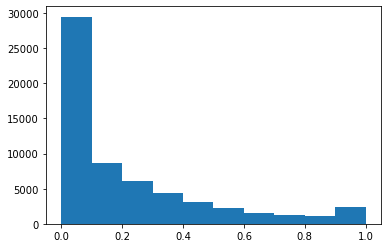

In [20]:
# prob of `1`
plt.hist(new_predsa[:, 1])

In [21]:
# new_data[id_vars]
df = new_data[id_vars]
df = df.assign(pred0=new_predsa[:, 0],
               pred1=new_predsa[:, 1])

df.head()

,system_key,yrq,tran_major_abbr,pred0,pred1
0,527,20224,N MATR,0.997362,0.002638
1,3579,20224,N MATR,0.999864,0.000136
2,4349,20224,N MATR,0.999624,0.000376
3,4587,20224,SUSTRN,0.994223,0.005777
4,4912,20224,N MATR,0.999930,0.000070


In [22]:
outpath = '../data-preds/'
fname = 'pred-proba-' + str(df['yrq'][0]) + '.csv'
df.to_csv(outpath + fname, index=False)
print('writing preds to:', outpath + fname)

writing preds to: ../data-preds/pred-proba-20224.csv


In [11]:
# # split ENG majors
# eng_abbvs = ['A A',
#              'BIOEN',
#              'BSE',
#              'C SCI',
#              'CHEM E',
#              'CIV E',
#              'CMP E',
#              'E E',
#              'ENGRUD',
#              'ENV E',
#              'HCDE',
#              'IND E',
#              'INT EN',
#              'M E',
#              'MS E',
#              'PREBSE',
#              'STARS']
# eng = df[df['tran_major_abbr'].isin(eng_abbvs)]

In [12]:
# eng.shape
# # transform
# # np.interp(eng['prob1'], eng['prob1'].min(), eng['prob1'].max(), (-5, 5))
# from sklearn.preprocessing import minmax_scale

(1981, 5)

,system_key,yrq,tran_major_abbr,proba
85,398775,20223,E E,-0.68
106,503745,20223,M E,-4.59
165,684523,20223,CIV E,-4.51
210,759307,20223,M E,-4.94
240,799511,20223,M E,-4.76


(array([1629.,  118.,   50.,   45.,   37.,   25.,   23.,   15.,   11.,
          28.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <BarContainer object of 10 artists>)

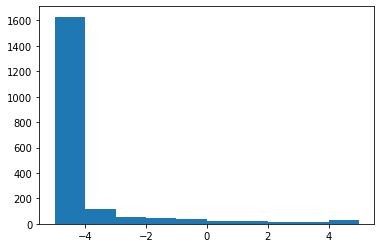

In [13]:
# proba = minmax_scale(eng['pred1'], feature_range=(-5, 5))

# eng_out = eng[id_vars]
# eng_out = eng_out.assign(proba = proba)
# eng_out['proba'] = round(eng_out['proba'], 2)
# eng_out.head()
# plt.hist(eng_out['proba'])

In [14]:
# eng_out.to_csv(outpath + 'pred-probs-eng-' + str(df['yrq'][0]) + '.csv', index=False)

In [15]:
# # write out the regular data w/o the tran_major_abbv
# df = df.drop(columns=['tran_major_abbr'])
# df.head()
# df.to_csv(outpath + fname, index=False)

,system_key,yrq,pred0,pred1
0,527,20223,0.978177,0.021823
1,4912,20223,0.975441,0.024559
2,7489,20223,0.885759,0.114241
3,12410,20223,0.842169,0.157831
4,13066,20223,0.690459,0.309541
